In [108]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [34]:
data = pd.read_csv(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamond.csv")

In [35]:
data

,carat,cut,color,clarity,height (in mm),table,price (in USD),length (in mm),width (in mm),depth (in mm)
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,7,3,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,7,3,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,4,3,2,61.0,58.0,2757,6.15,6.12,3.74


In [36]:
data.head()

,carat,cut,color,clarity,height (in mm),table,price (in USD),length (in mm),width (in mm),depth (in mm)
0,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carat           53940 non-null  float64
 1   cut             53940 non-null  int64  
 2   color           53940 non-null  int64  
 3   clarity         53940 non-null  int64  
 4   height (in mm)  53940 non-null  float64
 5   table           53940 non-null  float64
 6   price (in USD)  53940 non-null  int64  
 7   length (in mm)  53940 non-null  float64
 8   width (in mm)   53940 non-null  float64
 9   depth (in mm)   53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [38]:
data.isnull().sum()

carat             0
cut               0
color             0
clarity           0
height (in mm)    0
table             0
price (in USD)    0
length (in mm)    0
width (in mm)     0
depth (in mm)     0
dtype: int64

In [39]:
data.dtypes

carat             float64
cut                 int64
color               int64
clarity             int64
height (in mm)    float64
table             float64
price (in USD)      int64
length (in mm)    float64
width (in mm)     float64
depth (in mm)     float64
dtype: object

In [40]:
data.describe()

,carat,cut,color,clarity,height (in mm),table,price (in USD),length (in mm),width (in mm),depth (in mm)
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3.904097,4.405803,4.051020,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.116600,1.701105,1.647136,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [41]:
numcols = data.select_dtypes(include = ['float64','int64']).columns.tolist()

C:\Users\KALPANIGAM\AppData\Local\Temp\ipykernel_24148\4154727937.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["carat"], color = colors[0], ax = axes[0,0])
C:\Users\KALPANIGAM\AppData\Local\Temp\ipykernel_24148\4154727937.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["heig

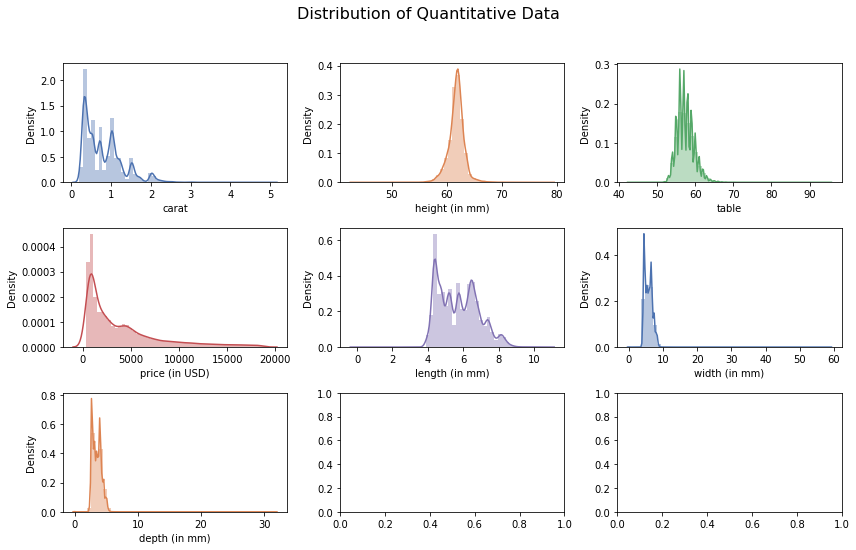

In [42]:
colors = sns.color_palette("deep")
fig,axes = plt.subplots(3,3, figsize = (12,8)) 
sns.distplot(data["carat"], color = colors[0], ax = axes[0,0])
sns.distplot(data["height (in mm)"], color = colors[1], ax = axes[0,1])
sns.distplot(data["table"], color = colors[2], ax = axes[0,2])
sns.distplot(data["price (in USD)"], color = colors[3], ax = axes[1,0])
sns.distplot(data["length (in mm)"], color = colors[4], ax = axes[1,1])
sns.distplot(data["width (in mm)"], color = colors[0], ax = axes[1,2])
sns.distplot(data["depth (in mm)"], color = colors[1], ax = axes[2,0])
plt.suptitle("Distribution of Quantitative Data", size = 16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

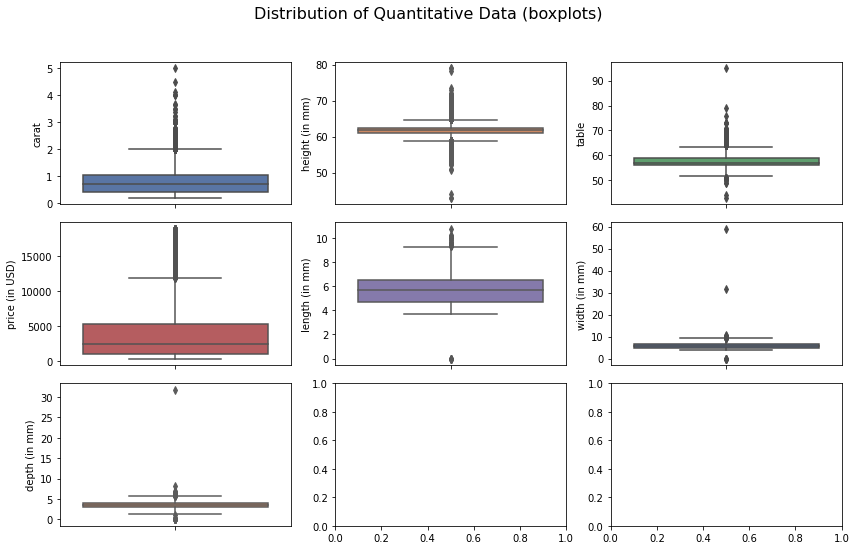

In [43]:
colors = sns.color_palette("deep")
fig,axes = plt.subplots(3,3, figsize = (12,8)) 
sns.boxplot(y = data["carat"], color = colors[0], ax = axes[0,0])
sns.boxplot(y = data["height (in mm)"], color = colors[1], ax = axes[0,1])
sns.boxplot(y = data["table"], color = colors[2], ax = axes[0,2])
sns.boxplot(y = data["price (in USD)"], color = colors[3], ax = axes[1,0])
sns.boxplot(y = data["length (in mm)"], color = colors[4], ax = axes[1,1])
sns.boxplot(y = data["width (in mm)"], color = colors[0], ax = axes[1,2])
sns.boxplot(y = data["depth (in mm)"], color = colors[1], ax = axes[2,0])
plt.suptitle("Distribution of Quantitative Data (boxplots)", size = 16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [44]:
zero_data = data[(data['length (in mm)'] == 0) | (data['width (in mm)'] == 0) | (data['depth (in mm)'] == 0)]

In [45]:
zero_data.head()

,carat,cut,color,clarity,height (in mm),table,price (in USD),length (in mm),width (in mm),depth (in mm)
2207,1.00,4,4,2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,4,3,1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,4,4,2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,4,5,2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,2,4,1,64.0,61.0,4731,7.15,7.04,0.0


In [46]:
zero_data.shape

(20, 10)

In [47]:
data.drop(zero_data.index, inplace = True)

In [48]:
data.shape

(53920, 10)

In [49]:
X = data.drop(['price (in USD)'], axis=1)
y = data['price (in USD)']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
print("Total dataset size: {}".format(data.shape))
print("Training set size (80%): {}".format(X_train.shape))
print("Test set size (20%): {}".format(X_test.shape))

Total dataset size: (53920, 10)
Training set size (80%): (43136, 9)
Test set size (20%): (10784, 9)


In [52]:
reg = RandomForestRegressor(n_estimators=1)

In [53]:
reg.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1)

In [54]:
y_pred = reg.predict(X_train)

In [55]:
print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9866483312986433
Adjusted R^2: 0.9866455449280476
MAE: 138.13744899851633
MSE: 211786.54612348796
RMSE: 460.2027228553607


In [56]:
X_train.shape

(43136, 9)

In [57]:
res=[]

In [58]:
for i in range (1,201):
    reg = RandomForestRegressor(n_estimators=i)
    reg.fit(X_train,y_train)
    y_pred = reg.predict(X_train)
    res.insert(i,metrics.r2_score(y_train, y_pred))

In [59]:
display(res)

[0.9867866654772721,
 0.9919152770295157,
 0.994014131934947,
 0.9948895370946665,
 0.9951305460496048,
 0.9957304167294108,
 0.9959255962278245,
 0.9962797025003408,
 0.9964060100581354,
 0.9963805959220091,
 0.9965047568541511,
 0.9966653559002431,
 0.9968160153863463,
 0.9968134555501603,
 0.9967795012680031,
 0.9967932382073997,
 0.9968892852772236,
 0.9969779978660801,
 0.9969815569434168,
 0.9970113303571942,
 0.997034302527441,
 0.997125025895464,
 0.9970394356414388,
 0.9969957954149621,
 0.9970937380343898,
 0.9971192034348438,
 0.9971060812602959,
 0.9972021237963872,
 0.997186321610399,
 0.997221341876266,
 0.9971246237333056,
 0.9971706360591471,
 0.9971689560309855,
 0.997120083424135,
 0.9972599701175645,
 0.9972541169966856,
 0.9971720264703647,
 0.9972010145035322,
 0.9972360731294643,
 0.9972498290573143,
 0.9973142390037125,
 0.9972947239289232,
 0.9972756081358373,
 0.9973152898914719,
 0.9972905135209668,
 0.9972572829614684,
 0.997287061865359,
 0.997284596350241,


In [60]:
res = np.round(res, 4)

In [61]:
display(res)

array([0.9868, 0.9919, 0.994 , 0.9949, 0.9951, 0.9957, 0.9959, 0.9963,
       0.9964, 0.9964, 0.9965, 0.9967, 0.9968, 0.9968, 0.9968, 0.9968,
       0.9969, 0.997 , 0.997 , 0.997 , 0.997 , 0.9971, 0.997 , 0.997 ,
       0.9971, 0.9971, 0.9971, 0.9972, 0.9972, 0.9972, 0.9971, 0.9972,
       0.9972, 0.9971, 0.9973, 0.9973, 0.9972, 0.9972, 0.9972, 0.9972,
       0.9973, 0.9973, 0.9973, 0.9973, 0.9973, 0.9973, 0.9973, 0.9973,
       0.9974, 0.9973, 0.9973, 0.9973, 0.9973, 0.9974, 0.9974, 0.9974,
       0.9973, 0.9974, 0.9974, 0.9974, 0.9974, 0.9974, 0.9974, 0.9973,
       0.9974, 0.9974, 0.9974, 0.9974, 0.9974, 0.9974, 0.9974, 0.9974,
       0.9974, 0.9974, 0.9974, 0.9974, 0.9974, 0.9974, 0.9974, 0.9974,
       0.9974, 0.9974, 0.9974, 0.9974, 0.9974, 0.9974, 0.9974, 0.9974,
       0.9974, 0.9974, 0.9974, 0.9974, 0.9974, 0.9974, 0.9974, 0.9974,
       0.9974, 0.9974, 0.9974, 0.9974, 0.9975, 0.9974, 0.9974, 0.9974,
       0.9974, 0.9974, 0.9974, 0.9975, 0.9975, 0.9974, 0.9974, 0.9974,
      

In [62]:
n_estimators = [i+1 for i in range(200)]

In [63]:
print (n_estimators)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200]


In [64]:
df=pd.DataFrame({'n_estimators':n_estimators, 'Accuracy':res})

In [65]:
df

,n_estimators,Accuracy
0,1,0.9868
1,2,0.9919
2,3,0.9940
3,4,0.9949
4,5,0.9951
...,...,...
195,196,0.9975
196,197,0.9975
197,198,0.9975
198,199,0.9975


Text(0.5, 1.0, 'n_estimators vs Accuracy')

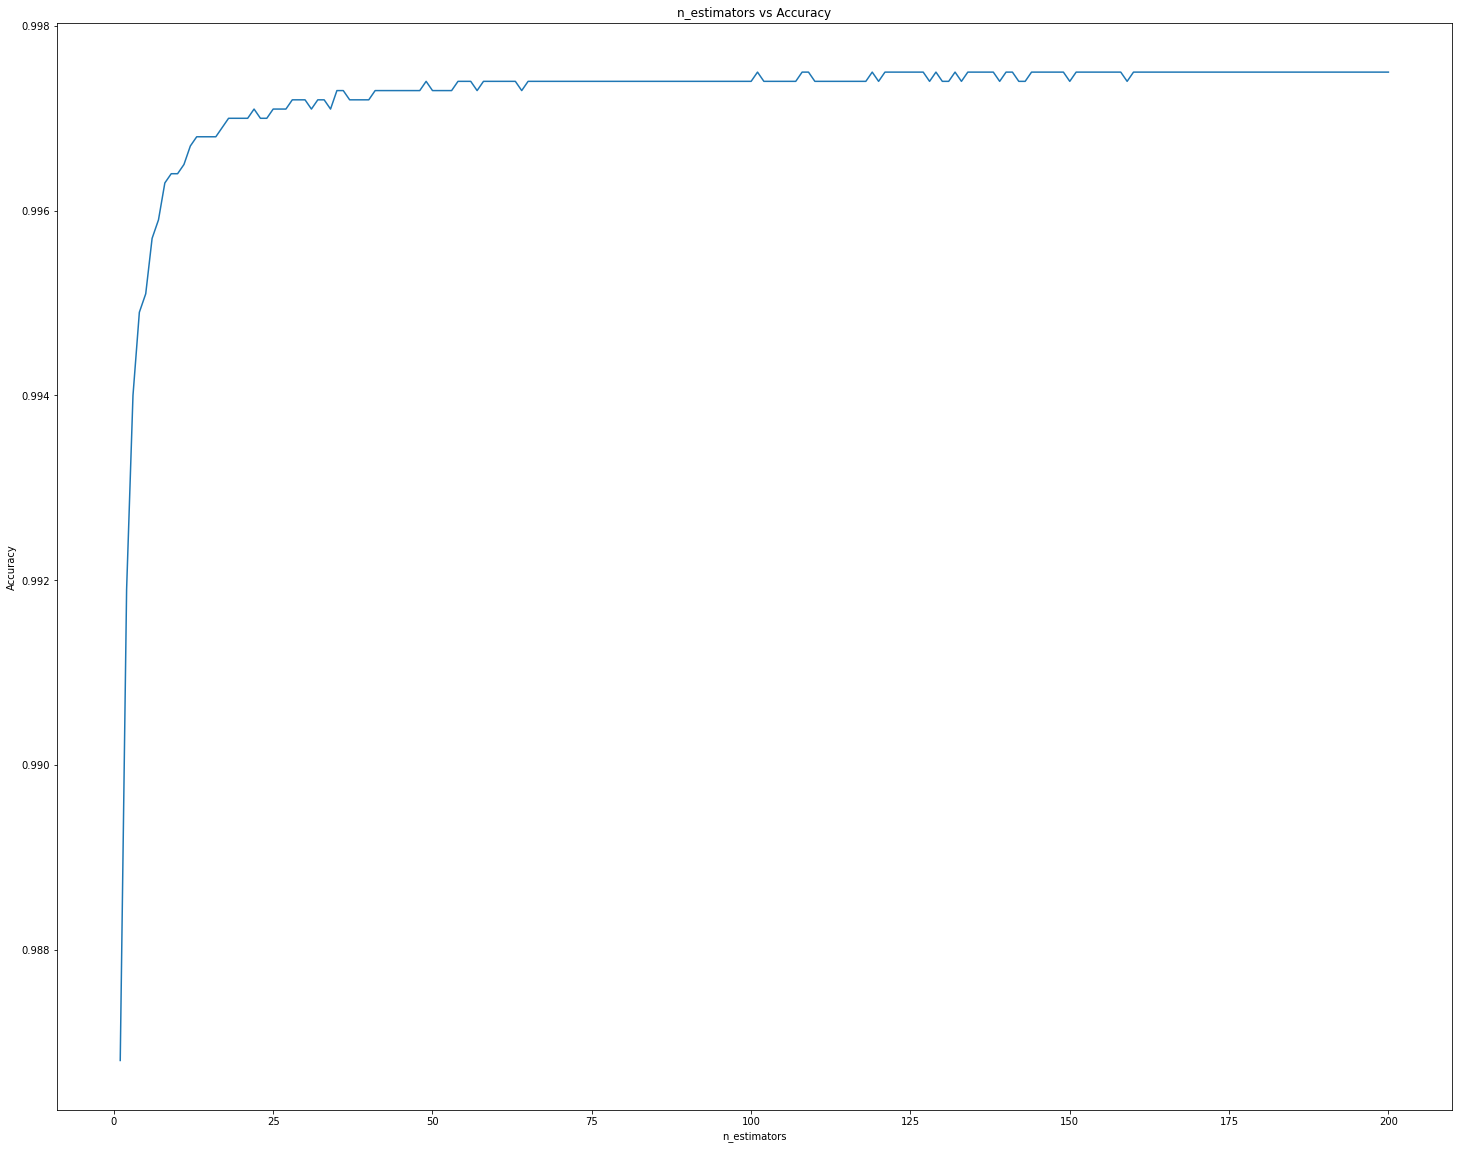

In [106]:
f = plt.figure(figsize=(20,25))
f.set_figwidth(25)
f.set_figheight(20)
plt.plot(n_estimators,res)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("n_estimators vs Accuracy")

In [67]:
file="result10.xlsx"

In [68]:
df.to_excel(file)

In [69]:
reg1 = RandomForestRegressor(n_estimators=170)
reg1.fit(X_train,y_train)
y_test_pred = reg1.predict(X_test)

In [70]:
print('R^2:',metrics.r2_score(y_test, y_test_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.9822175620286142
Adjusted R^2: 0.98220270756957
MAE: 264.9191248801697
MSE: 285241.6239958971
RMSE: 534.0801662633589


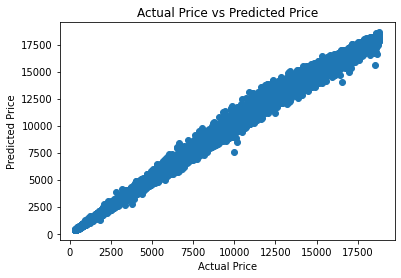

In [71]:
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

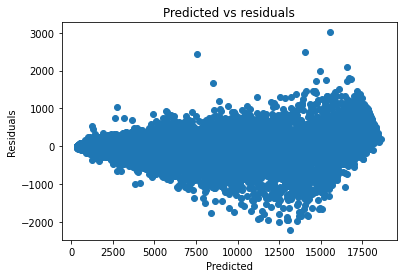

In [72]:
plt.scatter(y_pred,y_train-y_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

In [73]:
df1=pd.DataFrame({'Actual Price':y_test, 'Predicted Price':y_test_pred})

In [74]:
df1

,Actual Price,Predicted Price
14725,605,597.535294
53505,2686,2563.052941
17604,7089,6300.547059
31287,450,436.182353
51843,2423,2357.782353
...,...,...
52657,2549,2619.094118
46920,1815,1704.964706
5046,573,566.305882
30676,737,737.117647


In [75]:
file1="result11.xlsx"

In [76]:
df1.to_excel(file1)

In [77]:
I=[]
for i in range (1,10785):
    I.insert(i,i)

In [78]:
display(I)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [79]:
I1=y_test.tolist()

In [80]:
I2=y_test_pred.tolist()

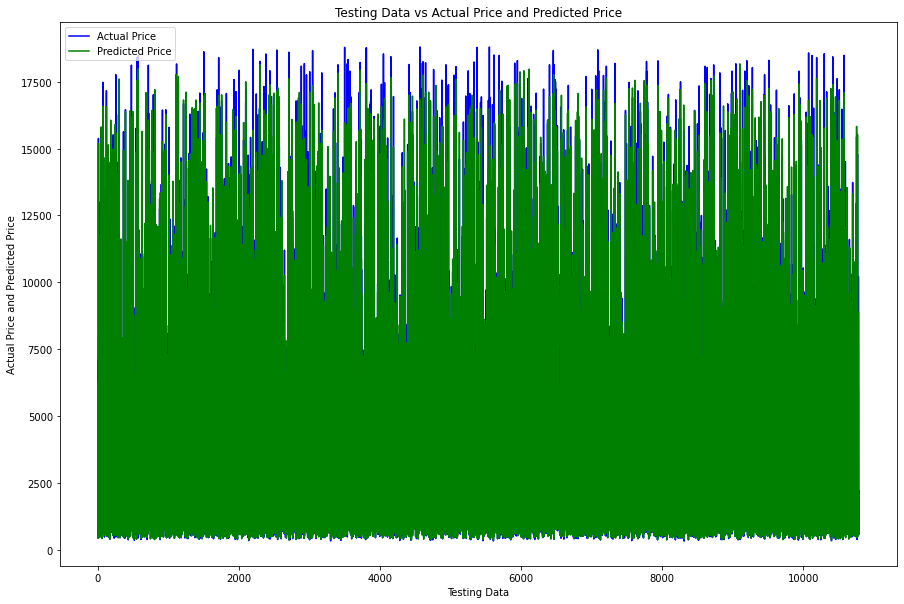

In [101]:
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(15)
plt.plot(I, I1, 'b', label='Actual Price')
plt.plot(I, I2, 'g', label='Predicted Price')
plt.xlabel("Testing Data")
plt.ylabel("Actual Price and Predicted Price")
plt.title("Testing Data vs Actual Price and Predicted Price")
plt.legend()

In [83]:
I3=I[0:1000]

In [84]:
I4=I1[0:1000]

In [85]:
I5=I2[0:1000]

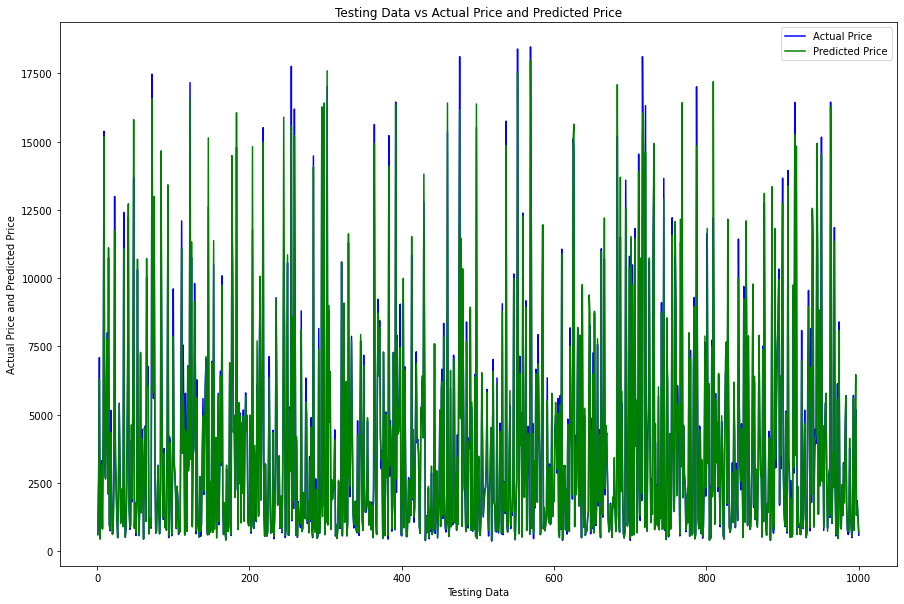

In [103]:
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(15)
plt.plot(I3, I4, 'b', label='Actual Price')
plt.plot(I3, I5, 'g', label='Predicted Price')
plt.xlabel("Testing Data")
plt.ylabel("Actual Price and Predicted Price")
plt.title("Testing Data vs Actual Price and Predicted Price")
plt.legend()

In [87]:
I6=I[0:100]

In [88]:
I7=I1[0:100]

In [89]:
I8=I2[0:100]

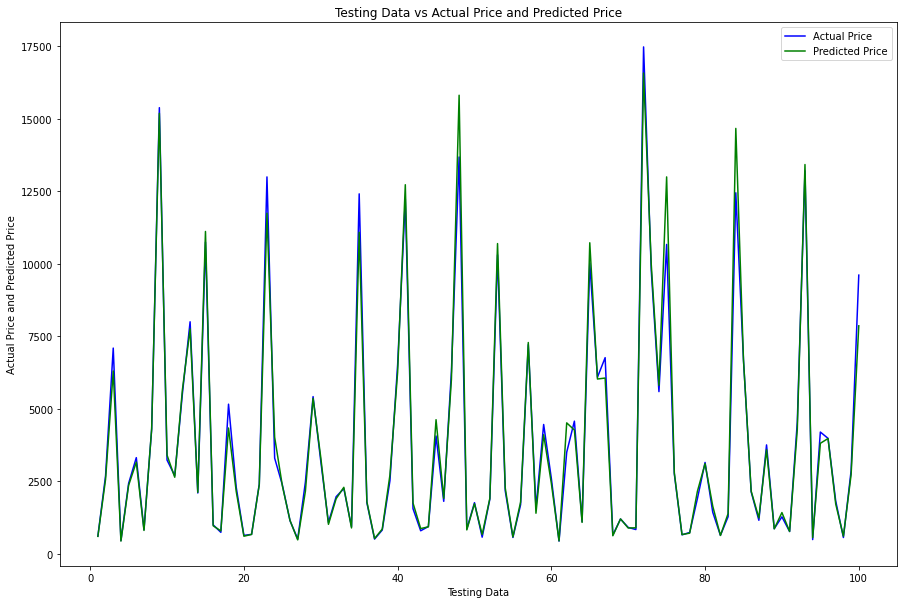

In [104]:
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(15)
plt.plot(I6, I7,'b', label='Actual Price')
plt.plot(I6, I8,'g', label='Predicted Price')
plt.xlabel("Testing Data")
plt.ylabel("Actual Price and Predicted Price")
plt.title("Testing Data vs Actual Price and Predicted Price")
plt.legend()

In [91]:
df1['Difference'] = None

In [92]:
df1['Percentage of Difference'] = None

In [93]:
df1

,Actual Price,Predicted Price,Difference,Percentage of Difference
14725,605,597.535294,None,None
53505,2686,2563.052941,None,None
17604,7089,6300.547059,None,None
31287,450,436.182353,None,None
51843,2423,2357.782353,None,None
...,...,...,...,...
52657,2549,2619.094118,None,None
46920,1815,1704.964706,None,None
5046,573,566.305882,None,None
30676,737,737.117647,None,None


In [94]:
index_actual=df1.columns.get_loc('Actual Price')
index_predicted=df1.columns.get_loc('Predicted Price')
index_difference=df1.columns.get_loc('Difference')
index_percentage=df1.columns.get_loc('Percentage of Difference')
 
print(index_actual,index_predicted,index_difference,index_percentage)

0 1 2 3


In [95]:
for row in range(0, len(df1)):
    df1.iat[row, index_difference] = abs(df1.iat[row, index_actual] - df1.iat[row, index_predicted])
    df1.iat[row, index_percentage] = df1.iat[row, index_difference]/df1.iat[row, index_actual]*100
    
df1

,Actual Price,Predicted Price,Difference,Percentage of Difference
14725,605,597.535294,7.464706,1.233836
53505,2686,2563.052941,122.947059,4.577329
17604,7089,6300.547059,788.452941,11.122203
31287,450,436.182353,13.817647,3.070588
51843,2423,2357.782353,65.217647,2.691607
...,...,...,...,...
52657,2549,2619.094118,70.094118,2.749867
46920,1815,1704.964706,110.035294,6.062551
5046,573,566.305882,6.694118,1.168258
30676,737,737.117647,0.117647,0.015963


In [96]:
file2="result12.xlsx"

In [97]:
df1.to_excel(file2)

In [203]:
import docx

In [204]:
import os

In [112]:
doc = docx.Document(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamond Price Prediction.docx")

In [122]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\1.jpeg",height=docx.shared.Cm(6.99),width=docx.shared.Cm(14.65))

In [123]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamond Price Prediction.docx")

In [125]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\2.jpeg",height=docx.shared.Cm(3.27),width=docx.shared.Cm(14.65))

In [126]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamond Price Prediction.docx")

In [127]:
doc = docx.Document(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [128]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\1.jpeg",height=docx.shared.Cm(6.99),width=docx.shared.Cm(14.65))

In [129]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [130]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\2.jpeg",height=docx.shared.Cm(3.27),width=docx.shared.Cm(14.65))

In [131]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [132]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\3.jpeg",height=docx.shared.Cm(7.62),width=docx.shared.Cm(9.14))

In [133]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [134]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\4.jpeg",height=docx.shared.Cm(4.87),width=docx.shared.Cm(4.00))

In [135]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [136]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\5.jpeg",height=docx.shared.Cm(4.92),width=docx.shared.Cm(5.17))

In [137]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [138]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\6.jpeg",height=docx.shared.Cm(3.88),width=docx.shared.Cm(16.34))

In [139]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [140]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\7.jpeg",height=docx.shared.Cm(9.39),width=docx.shared.Cm(14.64))

In [141]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [142]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\8.jpeg",height=docx.shared.Cm(9.43),width=docx.shared.Cm(14.64))

In [143]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [144]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\9.jpeg",height=docx.shared.Cm(3.10),width=docx.shared.Cm(14.64))

In [145]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [146]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\10.jpeg",height=docx.shared.Cm(0.37),width=docx.shared.Cm(1.57))

In [147]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [148]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\11.jpeg",height=docx.shared.Cm(0.37),width=docx.shared.Cm(2.19))

In [149]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [150]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\12.jpeg",height=docx.shared.Cm(1.29),width=docx.shared.Cm(7.14))

In [151]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [152]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\13.jpeg",height=docx.shared.Cm(1.52),width=docx.shared.Cm(7.78))

In [153]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [154]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\14.jpeg",height=docx.shared.Cm(2.15),width=docx.shared.Cm(6.58))

In [155]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [156]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\15.jpeg",height=docx.shared.Cm(0.37),width=docx.shared.Cm(2.01))

In [157]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [158]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\16.1.jpeg",height=docx.shared.Cm(8.55),width=docx.shared.Cm(4.27))

In [159]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [160]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\16.2.jpeg",height=docx.shared.Cm(8.84),width=docx.shared.Cm(3.93))

In [161]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [162]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\16.3.jpeg",height=docx.shared.Cm(8.84),width=docx.shared.Cm(3.99))

In [163]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [164]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\16.4.jpeg",height=docx.shared.Cm(8.93),width=docx.shared.Cm(3.97))

In [165]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [166]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\16.5.jpeg",height=docx.shared.Cm(8.91),width=docx.shared.Cm(3.95))

In [167]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [168]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\16.6.jpeg",height=docx.shared.Cm(8.89),width=docx.shared.Cm(3.95))

In [169]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [170]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\16.7.jpeg",height=docx.shared.Cm(8.85),width=docx.shared.Cm(3.95))

In [171]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [172]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\16.8.jpeg",height=docx.shared.Cm(8.82),width=docx.shared.Cm(3.93))

In [173]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [174]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\16.9.jpeg",height=docx.shared.Cm(8.84),width=docx.shared.Cm(3.93))

In [175]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [176]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\16.10.jpeg",height=docx.shared.Cm(8.80),width=docx.shared.Cm(3.88))

In [177]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [178]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\16.11.jpeg",height=docx.shared.Cm(0.37),width=docx.shared.Cm(3.85))

In [179]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [180]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\17.jpeg",height=docx.shared.Cm(11.36),width=docx.shared.Cm(14.55))

In [181]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [182]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\18.jpeg",height=docx.shared.Cm(2.47),width=docx.shared.Cm(17.14))

In [183]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [184]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\19.jpeg",height=docx.shared.Cm(8.96),width=docx.shared.Cm(5.03))

In [185]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [186]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\20.jpeg",height=docx.shared.Cm(11.27),width=docx.shared.Cm(14.64))

In [187]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [188]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\21.jpeg",height=docx.shared.Cm(2.13),width=docx.shared.Cm(6.16))

In [189]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [190]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\22.jpeg",height=docx.shared.Cm(8.94),width=docx.shared.Cm(6.09))

In [191]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [192]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\23.jpeg",height=docx.shared.Cm(10.08),width=docx.shared.Cm(14.64))

In [193]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [194]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\24.jpeg",height=docx.shared.Cm(10.21),width=docx.shared.Cm(14.65))

In [195]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [196]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\25.jpeg",height=docx.shared.Cm(10.19),width=docx.shared.Cm(14.63))

In [197]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [198]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\26.jpeg",height=docx.shared.Cm(8.94),width=docx.shared.Cm(11.99))

In [199]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [200]:
doc.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\27.jpeg",height=docx.shared.Cm(8.91),width=docx.shared.Cm(12.19))

In [201]:
doc.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds Price Prediction.docx")

In [207]:
doc1 = docx.Document(r"D:\7th Semester B.Tech (IT)\5. Minor Project\result10.docx")

PackageNotFoundError: Package not found at 'D:\7th Semester B.Tech (IT)\5. Minor Project\result10.docx'

In [212]:
import docx

In [213]:
import os

In [215]:
doc1 = docx.Document(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Result 10.docx")

In [216]:
doc1.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\29.1.jpeg",height=docx.shared.Cm(11.75),width=docx.shared.Cm(6.51))

In [217]:
doc1.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Result 10.docx")

In [218]:
doc1.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\29.2.jpeg",height=docx.shared.Cm(11.15),width=docx.shared.Cm(6.51))

In [219]:
doc1.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Result 10.docx")

In [220]:
doc1.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\29.3.jpeg",height=docx.shared.Cm(11.18),width=docx.shared.Cm(6.53))

In [221]:
doc1.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Result 10.docx")

In [222]:
doc1.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\29.4.jpeg",height=docx.shared.Cm(11.15),width=docx.shared.Cm(6.49))

In [223]:
doc1.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Result 10.docx")

In [224]:
doc1.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\29.5.jpeg",height=docx.shared.Cm(11.15),width=docx.shared.Cm(6.49))

In [225]:
doc1.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Result 10.docx")

In [226]:
doc1.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\29.6.jpeg",height=docx.shared.Cm(11.18),width=docx.shared.Cm(6.54))

In [227]:
doc1.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Result 10.docx")

In [228]:
doc1.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\29.7.jpeg",height=docx.shared.Cm(11.17),width=docx.shared.Cm(6.53))

In [229]:
doc1.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Result 10.docx")

In [230]:
doc1.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\29.8.jpeg",height=docx.shared.Cm(11.17),width=docx.shared.Cm(6.51))

In [231]:
doc1.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Result 10.docx")

In [232]:
doc1.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\29.9.jpeg",height=docx.shared.Cm(11.17),width=docx.shared.Cm(6.51))

In [233]:
doc1.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Result 10.docx")

In [234]:
doc1.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\29.10.jpeg",height=docx.shared.Cm(1.52),width=docx.shared.Cm(6.53))

In [235]:
doc1.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Result 10.docx")

In [236]:
doc2 = docx.Document(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Result 12.docx")

In [237]:
doc2.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\30.1.jpeg",height=docx.shared.Cm(11.18),width=docx.shared.Cm(13.04))

In [238]:
doc2.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Result 12.docx")

In [239]:
doc2.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\30.2.jpeg",height=docx.shared.Cm(10.18),width=docx.shared.Cm(13.00))

In [240]:
doc2.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Result 12.docx")

In [241]:
doc2.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\30.3.jpeg",height=docx.shared.Cm(10.67),width=docx.shared.Cm(13.02))

In [242]:
doc2.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Result 12.docx")

In [243]:
doc2.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\30.4.jpeg",height=docx.shared.Cm(10.20),width=docx.shared.Cm(13.02))

In [244]:
doc2.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Result 12.docx")

In [245]:
doc2.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\30.5.jpeg",height=docx.shared.Cm(9.68),width=docx.shared.Cm(13.00))

In [246]:
doc2.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Result 12.docx")

In [247]:
doc3 = docx.Document(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds.docx")

In [248]:
doc3.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\31.1.jpeg",height=docx.shared.Cm(7.39),width=docx.shared.Cm(14.65))

In [249]:
doc3.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds.docx")

In [250]:
doc3.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\31.2.jpeg",height=docx.shared.Cm(7.01),width=docx.shared.Cm(14.63))

In [251]:
doc3.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds.docx")

In [252]:
doc3.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\31.3.jpeg",height=docx.shared.Cm(7.01),width=docx.shared.Cm(14.63))

In [253]:
doc3.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds.docx")

In [254]:
doc3.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\31.4.jpeg",height=docx.shared.Cm(7.04),width=docx.shared.Cm(14.63))

In [255]:
doc3.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds.docx")

In [256]:
doc3.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\31.5.jpeg",height=docx.shared.Cm(7.00),width=docx.shared.Cm(14.65))

In [257]:
doc3.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds.docx")

In [258]:
doc3.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\31.6.jpeg",height=docx.shared.Cm(7.02),width=docx.shared.Cm(14.65))

In [259]:
doc3.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds.docx")

In [260]:
doc3.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\31.7.jpeg",height=docx.shared.Cm(7.04),width=docx.shared.Cm(14.65))

In [261]:
doc3.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds.docx")

In [262]:
doc3.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\31.8.jpeg",height=docx.shared.Cm(7.04),width=docx.shared.Cm(14.65))

In [263]:
doc3.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds.docx")

In [264]:
doc3.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\31.9.jpeg",height=docx.shared.Cm(7.04),width=docx.shared.Cm(14.63))

In [265]:
doc3.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds.docx")

In [266]:
doc3.add_picture(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Python\31.10.jpeg",height=docx.shared.Cm(3.99),width=docx.shared.Cm(14.65))

In [267]:
doc3.save(r"D:\7th Semester B.Tech (IT)\5. Minor Project\Diamonds.docx")